In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Cargar los datos de entrenamiento y prueba
test_data = pd.read_csv('/content/test_hogares_final.csv')
train_data = pd.read_csv('/content/train_hogares_final.csv')

# Seleccionar las variables predictoras y la variable objetivo
X_train = train_data[['Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100',
                         'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c',
                         'Depto', 'Fex_dpto', 'Vivienda_Propia_Pagada', 'Vivienda_Pagando',
                         'Vivienda_Arriendo', 'Vivienda_Usufructo', 'Vivienda_Posesion_Sin_Titulo',
                         'Vivienda_Otra', 'Indicador_Arriendo', 'Indicador_Hacinamiento_Critico',
                         'Num_Personas_Trabajando', 'Proporción_Ocupados', 'Promedio_Edad_Ocupados',
                         'Num_Personas_Estudiando', 'Proporción_Estudiando', 'Num_Dependientes',
                         'Proporción_Dependientes', 'Num_Mujeres', 'Proporción_Mujeres',
                         'Nivel_Educativo_Maximo', 'Max_Ninguno', 'Max_Preescolar',
                         'Max_Basica_Primaria', 'Max_Basica_Secundaria', 'Max_Media', 'Max_Superior',
                         'Num_Personas_Media_Superior', 'Indicador_Hogar_Jefe_Femenino']]

y_train = train_data['Pobre']  # La variable objetivo

X_test = test_data[['Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100',
                       'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c',
                       'Depto', 'Fex_dpto', 'Vivienda_Propia_Pagada', 'Vivienda_Pagando',
                       'Vivienda_Arriendo', 'Vivienda_Usufructo', 'Vivienda_Posesion_Sin_Titulo',
                       'Vivienda_Otra', 'Indicador_Arriendo', 'Indicador_Hacinamiento_Critico',
                       'Num_Personas_Trabajando', 'Proporción_Ocupados', 'Promedio_Edad_Ocupados',
                       'Num_Personas_Estudiando', 'Proporción_Estudiando', 'Num_Dependientes',
                       'Proporción_Dependientes', 'Num_Mujeres', 'Proporción_Mujeres',
                       'Nivel_Educativo_Maximo', 'Max_Ninguno', 'Max_Preescolar',
                       'Max_Basica_Primaria', 'Max_Basica_Secundaria', 'Max_Media', 'Max_Superior',
                       'Num_Personas_Media_Superior', 'Indicador_Hogar_Jefe_Femenino']]

# Excluir las columnas con muchos valores faltantes
columns_to_exclude = ['P5100', 'P5140', 'P5130', 'Promedio_Edad_Ocupados']

X_train_selected = X_train.drop(columns=columns_to_exclude)
X_test_selected = X_test.drop(columns=columns_to_exclude)

# Convertir las variables categóricas en dummies
X_train_selected = pd.get_dummies(X_train_selected, columns=['Clase', 'Dominio', 'Depto'])
X_test_selected = pd.get_dummies(X_test_selected, columns=['Clase', 'Dominio', 'Depto'])

# Alinear las columnas entre los conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected = X_train_selected.align(X_test_selected, join='left', axis=1, fill_value=0)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_selected = imputer.fit_transform(X_train_selected)
X_test_selected = imputer.transform(X_test_selected)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_selected, y_train)

# Verificar los coeficientes del modelo entrenado
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)


Valores faltantes en X_train_selected: 0
Valores faltantes en X_test_selected: 0
Coeficientes del modelo: [-3.28074810e-02 -1.53984387e-02  3.54321862e-02  9.47881295e-02
  1.74251047e-02 -4.63723180e-06  2.09465937e-06 -3.53196359e-05
  8.13189714e-05 -3.89055364e-03  1.47689162e-02  1.23029633e-02
 -8.63647369e-02  6.07655013e-02  2.41790972e-03  1.23029633e-02
  9.30479787e-02 -1.27940880e-01 -1.62441296e-02 -1.15784783e-03
  4.47335853e-02 -9.70076983e-03  1.82813551e-04  1.06993435e-02
 -2.39825902e-02 -1.12516414e-02  1.69442299e-03  1.34892202e-01
 -4.91490943e-02 -3.72107343e-02 -3.81657849e-02 -1.04312592e-01
 -4.67932922e-02  3.00520685e-02 -4.47982019e-02  4.47982019e-02
  8.84881553e-02  2.87083865e-02 -2.65283540e-02  2.08874807e-02
  5.50895136e-02 -3.26934159e-02 -5.00932079e-02  7.82284566e-02
 -5.12085025e-02 -4.12845379e-02  1.93320364e-03 -6.83965494e-02
 -1.57890914e-02 -6.04676565e-02  7.60499930e-03 -8.32932084e-02
 -7.69521205e-02  7.64322840e-02  5.21941319e-02 

In [ ]:
# Hacer predicciones con el conjunto de entrenamiento
y_pred = model.predict(X_train_selected)

# Evaluar el modelo
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print("R-cuadrado:", r2)
print("Error cuadrático medio (MSE):", mse)


R-cuadrado: 0.2979435006528377
Error cuadrático medio (MSE): 0.11241072713321439


In [ ]:

# Hacer predicciones con el conjunto de prueba
y_pred_test = model.predict(X_test_selected)

# Asegurarse de que el número de predicciones coincida con el número de IDs
print(f"Longitud de las predicciones: {len(y_pred_test)}")
print(f"Longitud de los IDs: {len(test_data['id'])}")

# Crear un DataFrame con las predicciones y los IDs
predicciones = pd.DataFrame({
    'id': test_data['id'],
    'Pobre_Pred': y_pred_test
})


Longitud de las predicciones: 66168
Longitud de los IDs: 66168


In [ ]:
# Convertir las predicciones continuas a binarias (umbral 0.5)
y_pred_test_binario = [1 if pred >= 0.5 else 0 for pred in y_pred_test]

# Crear el DataFrame con los IDs y las predicciones binarias
predicciones = pd.DataFrame({
    'id': test_data['id'],  # Asegúrate de que 'id' sea la columna correcta
    'Pobre_Pred': y_pred_test_binario  # Predicciones binarias
})

# Guardar el DataFrame
predicciones.to_csv('predicciones_kaggle_RL.csv', index=False)




Archivo 'predicciones_kaggle.csv' generado con éxito.


Valores faltantes en X_train_selected: 0
Valores faltantes en X_test_selected: 0
Coeficientes del modelo: [-3.28074810e-02 -1.53984387e-02  3.54321862e-02  9.47881295e-02
  1.74251047e-02 -4.63723180e-06  2.09465937e-06 -3.53196359e-05
  8.13189714e-05 -3.89055364e-03  1.47689162e-02  1.23029633e-02
 -8.63647369e-02  6.07655013e-02  2.41790972e-03  1.23029633e-02
  9.30479787e-02 -1.27940880e-01 -1.62441296e-02 -1.15784783e-03
  4.47335853e-02 -9.70076983e-03  1.82813551e-04  1.06993435e-02
 -2.39825902e-02 -1.12516414e-02  1.69442299e-03  1.34892202e-01
 -4.91490943e-02 -3.72107343e-02 -3.81657849e-02 -1.04312592e-01
 -4.67932922e-02  3.00520685e-02 -4.47982019e-02  4.47982019e-02
  8.84881553e-02  2.87083865e-02 -2.65283540e-02  2.08874807e-02
  5.50895136e-02 -3.26934159e-02 -5.00932079e-02  7.82284566e-02
 -5.12085025e-02 -4.12845379e-02  1.93320364e-03 -6.83965494e-02
 -1.57890914e-02 -6.04676565e-02  7.60499930e-03 -8.32932084e-02
 -7.69521205e-02  7.64322840e-02  5.21941319e-02 

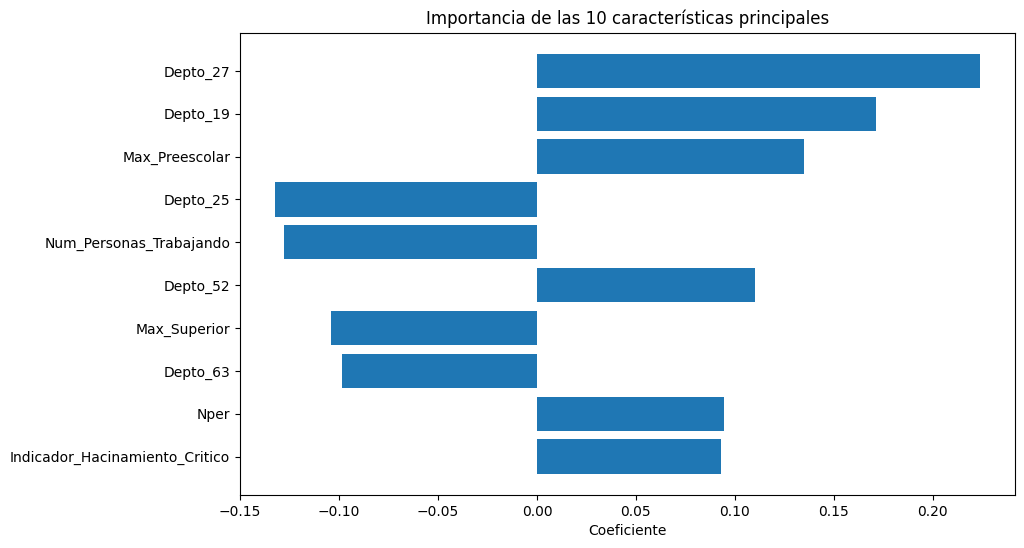

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de entrenamiento y prueba
test_data = pd.read_csv('/content/test_hogares_final.csv')
train_data = pd.read_csv('/content/train_hogares_final.csv')

# Seleccionar las variables predictoras y la variable objetivo
X_train = train_data[['Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100',
                         'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c',
                         'Depto', 'Fex_dpto', 'Vivienda_Propia_Pagada', 'Vivienda_Pagando',
                         'Vivienda_Arriendo', 'Vivienda_Usufructo', 'Vivienda_Posesion_Sin_Titulo',
                         'Vivienda_Otra', 'Indicador_Arriendo', 'Indicador_Hacinamiento_Critico',
                         'Num_Personas_Trabajando', 'Proporción_Ocupados', 'Promedio_Edad_Ocupados',
                         'Num_Personas_Estudiando', 'Proporción_Estudiando', 'Num_Dependientes',
                         'Proporción_Dependientes', 'Num_Mujeres', 'Proporción_Mujeres',
                         'Nivel_Educativo_Maximo', 'Max_Ninguno', 'Max_Preescolar',
                         'Max_Basica_Primaria', 'Max_Basica_Secundaria', 'Max_Media', 'Max_Superior',
                         'Num_Personas_Media_Superior', 'Indicador_Hogar_Jefe_Femenino']]

y_train = train_data['Pobre']  # La variable objetivo

X_test = test_data[['Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100',
                       'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c',
                       'Depto', 'Fex_dpto', 'Vivienda_Propia_Pagada', 'Vivienda_Pagando',
                       'Vivienda_Arriendo', 'Vivienda_Usufructo', 'Vivienda_Posesion_Sin_Titulo',
                       'Vivienda_Otra', 'Indicador_Arriendo', 'Indicador_Hacinamiento_Critico',
                       'Num_Personas_Trabajando', 'Proporción_Ocupados', 'Promedio_Edad_Ocupados',
                       'Num_Personas_Estudiando', 'Proporción_Estudiando', 'Num_Dependientes',
                       'Proporción_Dependientes', 'Num_Mujeres', 'Proporción_Mujeres',
                       'Nivel_Educativo_Maximo', 'Max_Ninguno', 'Max_Preescolar',
                       'Max_Basica_Primaria', 'Max_Basica_Secundaria', 'Max_Media', 'Max_Superior',
                       'Num_Personas_Media_Superior', 'Indicador_Hogar_Jefe_Femenino']]

# Excluir las columnas con muchos valores faltantes
columns_to_exclude = ['P5100', 'P5140', 'P5130', 'Promedio_Edad_Ocupados']

# Crear nuevas versiones de los conjuntos de datos excluyendo estas columnas
X_train_selected = X_train.drop(columns=columns_to_exclude)
X_test_selected = X_test.drop(columns=columns_to_exclude)

# Convertir las variables categóricas en dummies (variables binarias)
X_train_selected = pd.get_dummies(X_train_selected, columns=['Clase', 'Dominio', 'Depto'])
X_test_selected = pd.get_dummies(X_test_selected, columns=['Clase', 'Dominio', 'Depto'])

# Alinear las columnas entre los conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected = X_train_selected.align(X_test_selected, join='left', axis=1, fill_value=0)

# Verificar si hay valores faltantes
print("Valores faltantes en X_train_selected:", X_train_selected.isnull().sum().sum())
print("Valores faltantes en X_test_selected:", X_test_selected.isnull().sum().sum())

# Imputar valores
imputer = SimpleImputer(strategy='mean')
X_train_selected = imputer.fit_transform(X_train_selected)
X_test_selected = imputer.transform(X_test_selected)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_selected, y_train)

# Verificar los coeficientes del modelo entrenado
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

# Crear una tabla de importancia de características basada en los coeficientes
importancia_caracteristicas = pd.DataFrame({
    'Característica': pd.get_dummies(X_train.drop(columns=columns_to_exclude), columns=['Clase', 'Dominio', 'Depto']).columns,
    'Coeficiente': model.coef_
})

# Ordenar las características por su importancia (valor absoluto del coeficiente)
importancia_caracteristicas['Coeficiente_Abs'] = importancia_caracteristicas['Coeficiente'].abs()
importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Coeficiente_Abs', ascending=False)

# Mostrar la tabla de las 10 características más importantes
print(importancia_caracteristicas[['Característica', 'Coeficiente']].head(10))

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importancia_caracteristicas['Característica'].head(10), importancia_caracteristicas['Coeficiente'].head(10))
plt.xlabel("Coeficiente")
plt.title("Importancia de las 10 características principales")
plt.gca().invert_yaxis()
plt.show()
